In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import refine as rf

In [4]:
import analysis as an

In [5]:
import visualisation as vis

In [6]:
#df=pd.read_csv("../data/CometLanding.csv")
df=pd.read_csv("../data/CometLanding_ref.csv")

In [7]:
#TOO be removed when other data set is ready
#df = df.drop_duplicates(keep = False)
#df = rf.removeNAN(df)
#df = rf.langCheck(df)

In [8]:
# vis.getTimesCreated(df)

In [9]:
# times[0]

In [10]:
# print("Number of unique users:", an.getNumberOfUniqueUsers(df))

In [11]:
# an.printAnalysis(df)

In [12]:
# an.printAverages(df)

In [13]:
# df.dtypes

In [14]:
# df["created_at"]

In [15]:
# df.dtypes

In [16]:
df["source"].unique()

array(['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://dev.twitter.com/docs/tfw" rel="nofollow">Twitter for Websites</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://bufferapp.com" rel="nofollow">Buffer</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
       '<a href="http://www.hyenaware.com" rel="nofollow">AllFilmBot</a>',
       '<a href="http://tapbots.com/software/tweetbot/mac" rel="nofollow">Tweetbot for Mac</a>',
       '<a href="http://gwittr.com" rel="nofollow">Gwittr Writer</a>',
       '<a href="http://dlvr.it" rel="nofollow">dlvr.it</a>',
       '<a href="http://www.hootsuite.com" rel="nofollow">Hootsuite</a>',
       '<a

In [17]:
dict = an.getAppsUsed(df)

{'Twitter Web Client': 27916, 'Twitter for Websites': 1460, 'Twitter for iPad': 3277, 'Twitter for iPhone': 13742, 'Twitter for Android': 12769, 'Buffer': 93, 'TweetDeck': 4072, 'AllFilmBot': 2, 'Tweetbot for Mac': 289, 'Gwittr Writer': 1, 'dlvr.it': 1671, 'Hootsuite': 799, 'Mobile Web (M5)': 315, 'Tweetbot for iÎŸS': 1054, 'Instagram': 57, 'my-app-z': 3, 'Twitter for Android Tablets': 897, 'Mobile Web (M2)': 228, 'HubSpot': 8, 'TweetAdder v4': 160, 'Echofon': 259, 'OS X': 22, 'Google': 10, 'TweetCaster for Android': 477, 'Carbon for Android': 27, 'Dat post': 5, '423Diotima': 6, 'iOS': 87, 'Twitter for  Android': 105, 'Flipboard': 35, 'PlumeÂ\xa0forÂ\xa0Android': 221, 'Twitter for BlackBerry': 292, 'botly': 27, 'Twitter for BlackBerryÂ®': 344, 'MetroTwit': 37, 'YoruFukurou': 35, 'Twitter for Windows Phone': 933, 'Favstar.FM': 1, 'IFTTT': 211, 'RNAutoRetweet': 36, 'Twitterrific': 68, ' Tweedle': 37, 'Sprout Social': 17, 'RoundTeam': 209, 'ScienceApp': 14, 'Crowdbooster': 2, 'SocialChoru

In [18]:
an.getPopularApps(5, dict)

['Twitter Web Client', 'Twitter for iPhone', 'Twitter for Android', 'TweetDeck', 'Twitter for iPad', 'dlvr.it', 'Twitter for Websites', 'Tweetbot for iÎŸS', 'Twitter for Windows Phone', 'Tweet Old Post', 'Twitter for Mac', 'Twitter for Android Tablets', 'Hootsuite', 'TweetCaster for Android', 'Twitter for BlackBerryÂ®', 'Ø§Ø´ØªØ±Ø±ÙƒÙ€Ù€Ù€ Ø§Ù„Ø¢Ù†', 'Mobile Web (M5)', 'Twitter for BlackBerry', 'Tweetbot for Mac', 'Echofon', 'Mobile Web (M2)', 'PlumeÂ\xa0forÂ\xa0Android', 'IFTTT', 'RoundTeam', 'Facebook', 'TweetAdder v4', 'myttmobile', 'twicca', 'Keitai Web', 'Twitter for  Android', 'Buffer', 'Janetter', 'iOS', 'Ø§Ø´Ù€ØªØ±ÙƒÙ€Ù€ ÙˆØ§Ø³ØªÙ…ØªØ¹', 'Twitterrific', 'Fenix for Android', 'Instagram', 'twitterfeed', 'Twitter for Windows', 'Lissted', 'Talon (Classic)', 'TweetCaster for iOS', 'Seesmic', 'TopTrendIT', 'MetroTwit', ' Tweedle', 'The Tweeted Times', 'RNAutoRetweet', 'Flipboard', 'YoruFukurou', 'SocialFlow', 'Twidere for Android #2', 'Tweetium for Windows', 'Carbon for Android', 'bo

Retweet %: 19.6178145635
Reply %: 78.1534190418


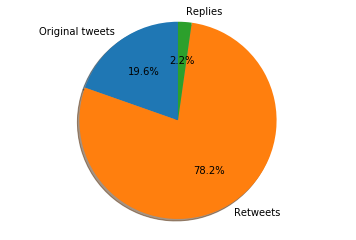

In [19]:
vis.plotStructure(df)